In [10]:

from sklearn import tree
import pandas as pd
import graphviz 
import pydotplus 
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
import graphviz 
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("/content/predictive_maintenance.csv")

# sample every 4th row
# df_sampled_train = df.iloc[::4, :]
# df_sampled_test = df.iloc[::4, :]
df['Target'] = df['Target'].replace({0: 'No Failure', 1: 'Failure'})

# display sampled dataset
# print(df_sampled)

In [3]:

from sklearn.model_selection import train_test_split


# Split into train and test sets using random sampling
# TrainDF1, TestDF1, Train1Labels, Test1Labels = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.3, random_state=42)
TrainDF1, TestDF1, Train1Labels, Test1Labels = train_test_split(df.iloc[:, 1:-2], df.iloc[:, -2], test_size=0.3, random_state=42)

# Print the shapes of the resulting datasets
print("Train data shape:", TrainDF1.shape)
print("Test data shape:", TestDF1.shape)
print("Train labels shape:", Train1Labels.shape)
print("Test labels shape:", Test1Labels.shape)


Train data shape: (7000, 5)
Test data shape: (3000, 5)
Train labels shape: (7000,)
Test labels shape: (3000,)


In [4]:
TrainDF1.head()

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear
9069,297.2,308.2,1678,28.1,133
2603,299.3,309.2,1334,46.3,31
7738,300.5,312.0,1263,60.8,146
1579,298.3,308.3,1444,43.8,176
5058,303.9,312.9,1526,42.5,194


In [5]:
TestDF1.head()

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear
6252,300.8,310.3,1538,36.1,198
4684,303.6,311.8,1421,44.8,101
1731,298.3,307.9,1485,42.0,117
4742,303.3,311.3,1592,33.7,14
4521,302.4,310.4,1865,23.9,129


      Air_temperature  Process_temperature  Rotational_speed  Torque  \
9069            297.2                308.2              1678    28.1   
2603            299.3                309.2              1334    46.3   
7738            300.5                312.0              1263    60.8   
1579            298.3                308.3              1444    43.8   
5058            303.9                312.9              1526    42.5   
...               ...                  ...               ...     ...   
5734            302.3                311.8              1369    56.2   
5191            304.0                313.2              1416    46.0   
5390            302.8                312.3              1483    47.2   
860             296.1                306.9              1541    32.6   
7270            300.2                310.4              1808    25.8   

      Tool_wear  
9069        133  
2603         31  
7738        146  
1579        176  
5058        194  
...         ...  
5734     

'Tree_Record.pdf'

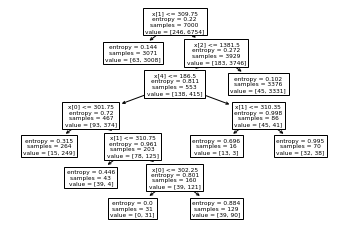

In [6]:
MyDT_R=DecisionTreeClassifier(criterion='entropy', ##"entropy" or "gini"
                            splitter='best',  ## or "random" or "best"
                            max_depth=8, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=1, 
                            random_state=None, 
                            max_leaf_nodes=8, 
                            min_impurity_decrease=0.0, 
                            class_weight=None)
print(TrainDF1)

## perform DT
MyDT_R.fit(TrainDF1, Train1Labels)
    ## plot the tree
tree.plot_tree(MyDT_R)

feature_namesR=TrainDF1.columns
print(feature_namesR)

##--------------------------------------------------------
## VIS 1 saved as Tree_Record.pdf
##-----------------------------------------------------------
TREE_data = tree.export_graphviz(MyDT_R, out_file=None,
                  feature_names=TrainDF1.columns,
                  class_names=["No Failure", "Failure"],
                  filled=True, 
                  rounded=True,  
                  special_characters=True) 
                                   
graph = graphviz.Source(TREE_data) 
graph.render("Tree_Record") 


In [7]:
#print("Prediction\n")
DT_pred_R=MyDT_R.predict(TestDF1)
#print(DT_pred_R)
##_--
## Show the confusion matrix
bn_matrix_R = confusion_matrix(Test1Labels, DT_pred_R)
print("\nThe confusion matrix is:")
print(bn_matrix_R)


The confusion matrix is:
[[  12   81]
 [  10 2897]]


In [8]:
from sklearn.metrics import accuracy_score

# assuming y_test and y_pred are the true labels and predicted labels, respectively
accuracy = accuracy_score(Test1Labels, DT_pred_R)
print("Accuracy:", accuracy)


Accuracy: 0.9696666666666667


<Axes: >

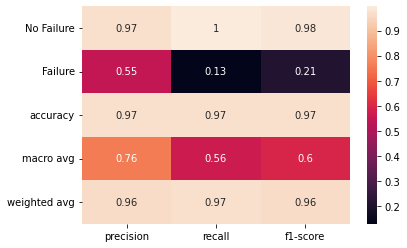

In [11]:
from sklearn.metrics import classification_report

clf_report = classification_report(Test1Labels,
                                   DT_pred_R,
                                   labels=["No Failure", "Failure"],
                                   output_dict=True)

# clf_report
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)


In [13]:
clf_report

{'No Failure': {'precision': 0.9728005372733378,
  'recall': 0.9965600275197798,
  'f1-score': 0.984536958368734,
  'support': 2907},
 'Failure': {'precision': 0.5454545454545454,
  'recall': 0.12903225806451613,
  'f1-score': 0.20869565217391303,
  'support': 93},
 'accuracy': 0.9696666666666667,
 'macro avg': {'precision': 0.7591275413639416,
  'recall': 0.562796142792148,
  'f1-score': 0.5966163052713235,
  'support': 3000},
 'weighted avg': {'precision': 0.9595528115269552,
  'recall': 0.9696666666666667,
  'f1-score': 0.9604858778766945,
  'support': 3000}}

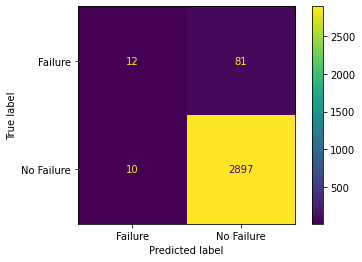

In [12]:

## Confusion Matrix Visual Code

import seaborn as sns
import matplotlib.pyplot as plt     

##########################################################
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


cm = confusion_matrix(Test1Labels, DT_pred_R, labels=MyDT_R.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=MyDT_R.classes_)                         
disp.plot()
plt.show()